In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from fedlab.contrib.dataset.adult import Adult
from fedlab.utils.dataset.partition import AdultPartitioner
from fedlab.utils.functional import partition_report

In [2]:
# Dataset and Partitioner
trainset = Adult("path_to_data/adult-a9a/", train=True, download=True)

Source file already downloaded.
Local file path_to_data/adult-a9a/a9a loaded.


In [3]:
# Parameters
num_clients = 10
seed = 2021
alpha_values = [0.1, 0.3, 1.0, 5.0, 10.0]
num_classes = 2
col_names = [f"class{i}" for i in range(num_classes)]
hist_color = "#00B1F0"

In [4]:
# Generate partitions
partitions = {}
for alpha in alpha_values:
    partitions[f"Dirichlet_alpha_{alpha}"] = AdultPartitioner(
        trainset.targets,
        num_clients=num_clients,
        partition="noniid-labeldir",
        dir_alpha=alpha,
        seed=seed,
    )

# IID Partition
partitions["Balanced_IID"] = AdultPartitioner(
    trainset.targets, num_clients=num_clients, partition="iid", seed=seed
)

Class frequencies:
client,class0,class1,Amount
Client   0,1.000,0.00,10542
Client   1,1.000,0.00,8454
Client   2,1.000,0.00,276
Client   3,0.00,1.000,2130
Client   4,0.00,1.000,814
Client   5,0.00,1.000,54
Client   6,0.987,0.013,2417
Client   7,0.992,0.008,1498
Client   8,0.246,0.754,6359
Client   9,0.647,0.353,17


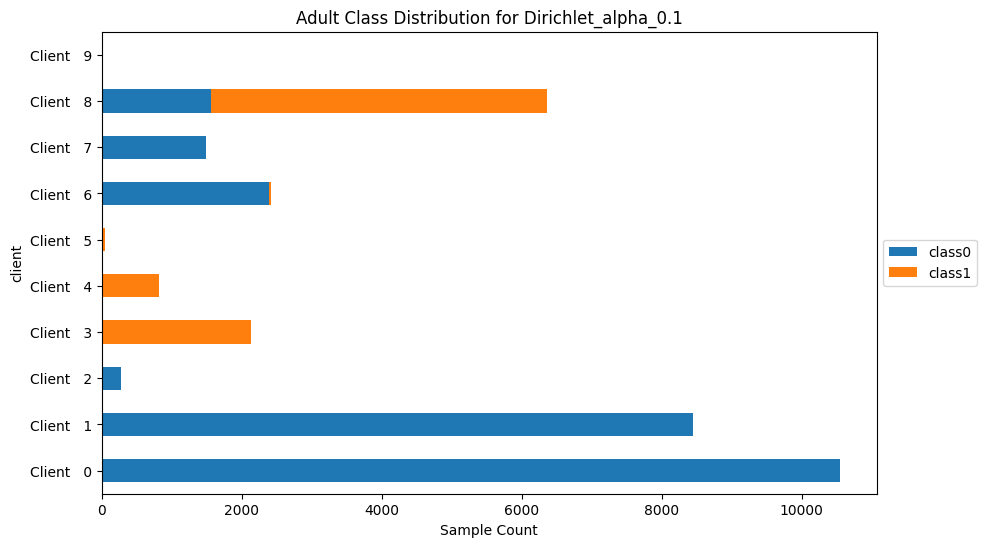

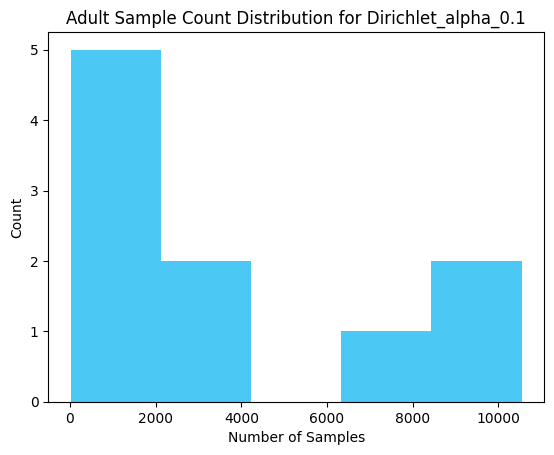

Class frequencies:
client,class0,class1,Amount
Client   0,1.000,0.000,3047
Client   1,0.909,0.091,11
Client   2,0.136,0.864,8469
Client   3,0.779,0.221,226
Client   4,0.403,0.597,236
Client   5,0.686,0.314,159
Client   6,0.748,0.252,710
Client   7,1.000,0.00,6610
Client   8,1.000,0.00,12399
Client   9,0.850,0.150,694


<Figure size 640x480 with 0 Axes>

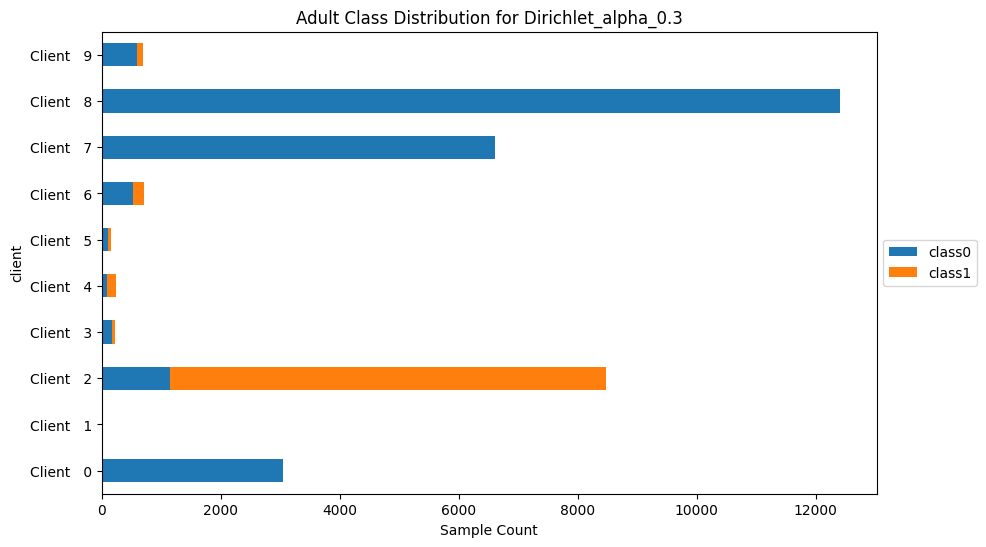

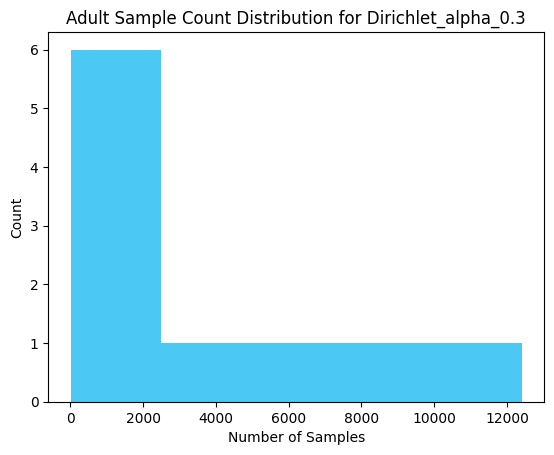

Class frequencies:
client,class0,class1,Amount
Client   0,0.510,0.490,3099
Client   1,0.294,0.706,4916
Client   2,0.740,0.260,285
Client   3,1.000,0.00,3303
Client   4,0.707,0.293,1506
Client   5,0.793,0.207,787
Client   6,0.234,0.766,2317
Client   7,0.900,0.100,2488
Client   8,1.000,0.00,12152
Client   9,0.913,0.087,1708


<Figure size 640x480 with 0 Axes>

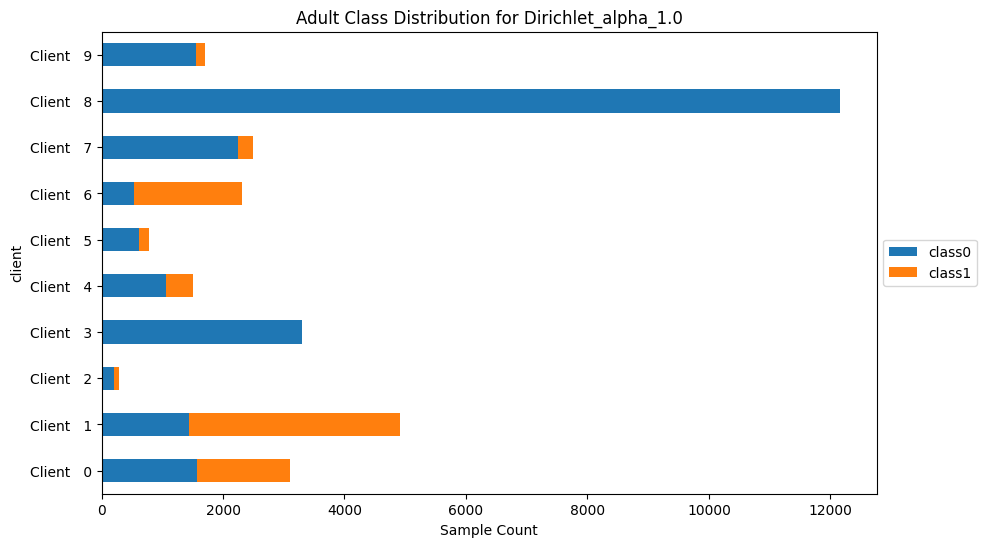

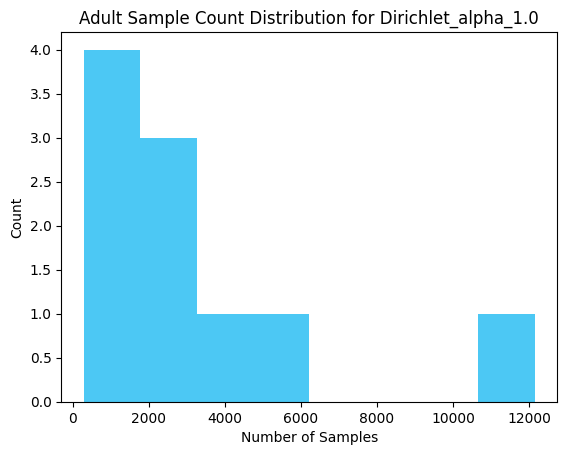

Class frequencies:
client,class0,class1,Amount
Client   0,0.298,0.702,1320
Client   1,1.000,0.00,5430
Client   2,0.552,0.448,2526
Client   3,0.631,0.369,3310
Client   4,0.882,0.118,3242
Client   5,0.783,0.217,3963
Client   6,0.765,0.235,2870
Client   7,0.538,0.462,3264
Client   8,1.000,0.00,4214
Client   9,0.529,0.471,2422


<Figure size 640x480 with 0 Axes>

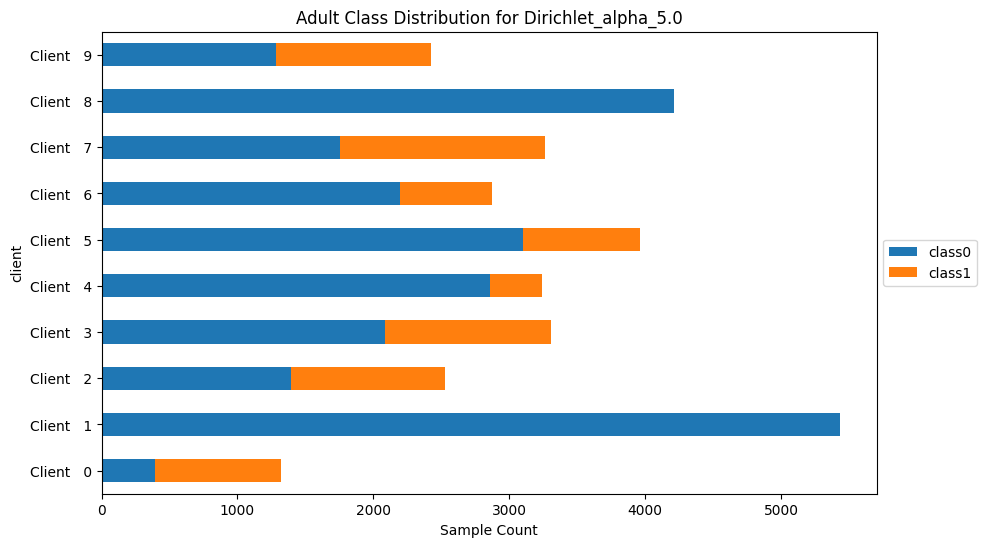

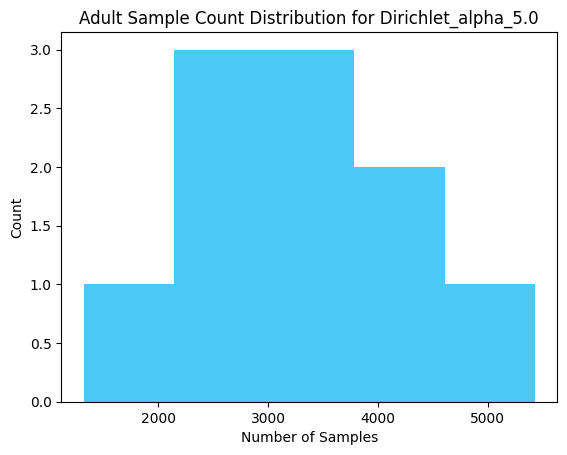

Class frequencies:
client,class0,class1,Amount
Client   0,0.463,0.537,1772
Client   1,1.000,0.00,4440
Client   2,0.614,0.386,2827
Client   3,0.662,0.338,3417
Client   4,0.841,0.159,3335
Client   5,0.767,0.233,3873
Client   6,0.753,0.247,3106
Client   7,0.600,0.400,3357
Client   8,1.000,0.00,3690
Client   9,0.599,0.401,2744


<Figure size 640x480 with 0 Axes>

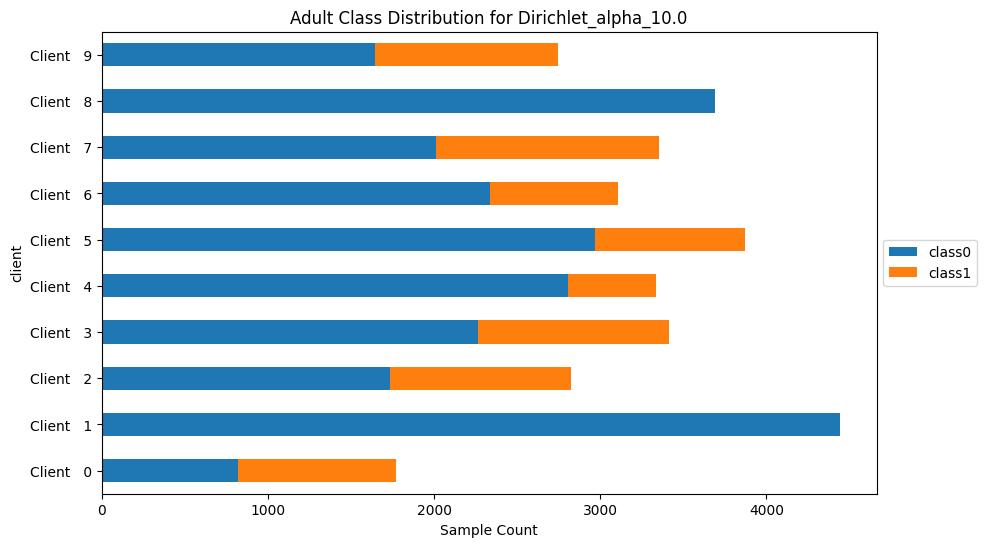

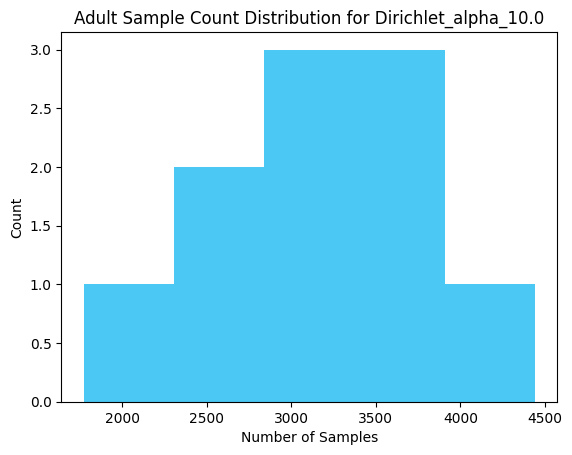

Class frequencies:
client,class0,class1,Amount
Client   0,0.751,0.249,3256
Client   1,0.766,0.234,3256
Client   2,0.764,0.236,3256
Client   3,0.758,0.242,3256
Client   4,0.757,0.243,3256
Client   5,0.757,0.243,3256
Client   6,0.756,0.244,3256
Client   7,0.768,0.232,3256
Client   8,0.763,0.237,3256
Client   9,0.753,0.247,3256


<Figure size 640x480 with 0 Axes>

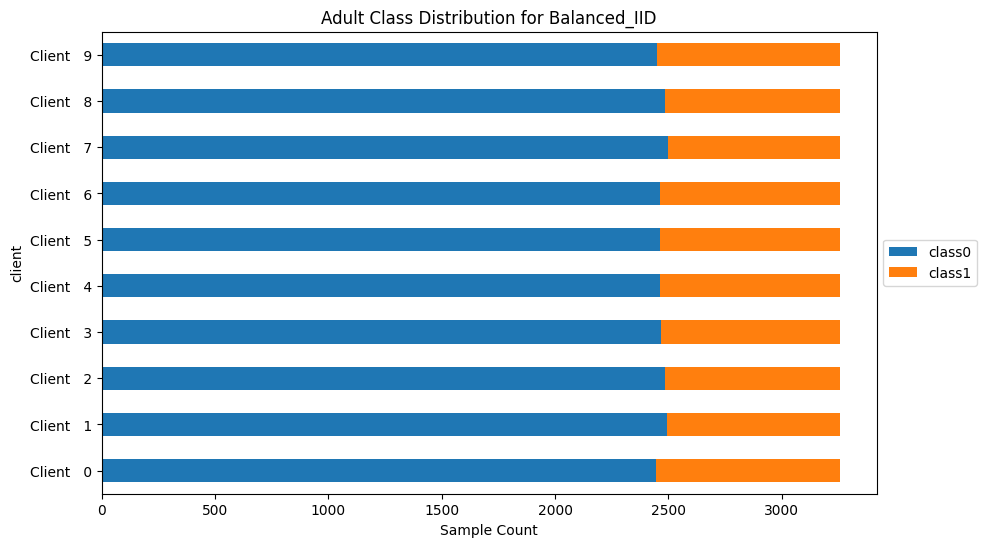

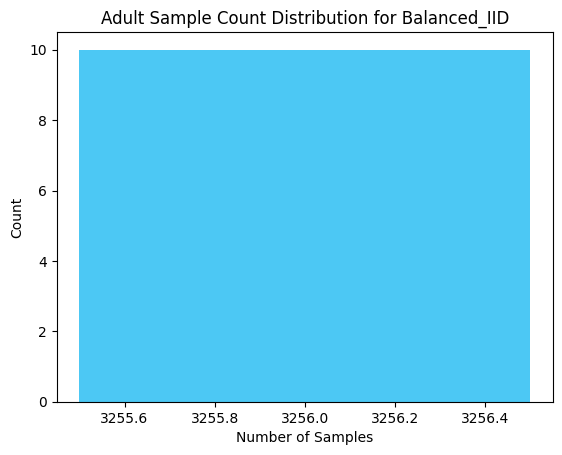

<Figure size 640x480 with 0 Axes>

In [5]:
# Generate Partition Reports and Visualizations
for name, part in partitions.items():
    csv_file = f"./partition-reports/Adult_{name}.csv"
    partition_report(
        trainset.targets, part.client_dict, class_num=num_classes, file=csv_file
    )

    partition_df = pd.read_csv(csv_file, header=1).set_index("client")
    for col in col_names:
        partition_df[col] = (partition_df[col] * partition_df["Amount"]).astype(int)

    # Class distribution plot (First 10 clients)
    partition_df[col_names].iloc[:10].plot.barh(stacked=True, figsize=(10, 6))
    plt.title(f"Adult Class Distribution for {name}")
    plt.xlabel("Sample Count")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(f"./imgs/Adult_{name}_class_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.clf()

    # Sample count distribution
    sns.histplot(
        data=partition_df["Amount"], color=hist_color, edgecolor="none", alpha=0.7
    )
    plt.title(f"Adult Sample Count Distribution for {name}")
    plt.xlabel("Number of Samples")
    plt.savefig(
        f"./imgs/Adult_{name}_sample_count_distribution.png", dpi=300, bbox_inches="tight"
    )
    plt.show()
    plt.clf()

In [6]:
def full_knowledge_trim_attack(partitioner, trim_rate=0.7):
    client_sample_counts = {
        client: len(samples) for client, samples in partitioner.client_dict.items()
    }

    sorted_clients = sorted(
        client_sample_counts.keys(), key=lambda k: client_sample_counts[k]
    )

    num_trim_clients = int(len(sorted_clients) * trim_rate)
    trimmed_clients = sorted_clients[:num_trim_clients]

    adjusted_client_dict = {
        client: samples
        for client, samples in partitioner.client_dict.items()
        if client not in trimmed_clients
    }

    return adjusted_client_dict, trimmed_clients

Class frequencies:
client,class0,class1,Amount
Client   0,1.000,0.00,10542
Client   1,1.000,0.00,8454
Client   8,0.246,0.754,6359


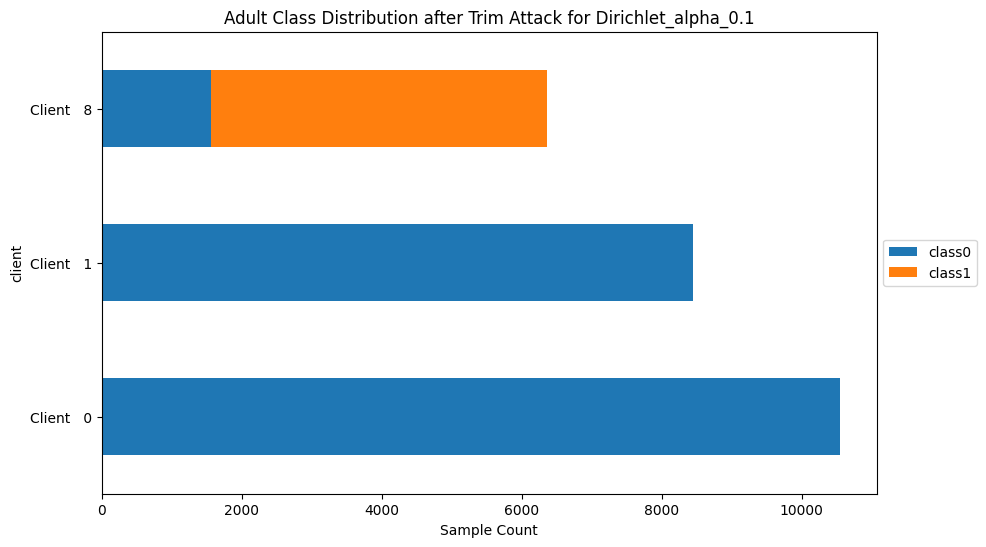

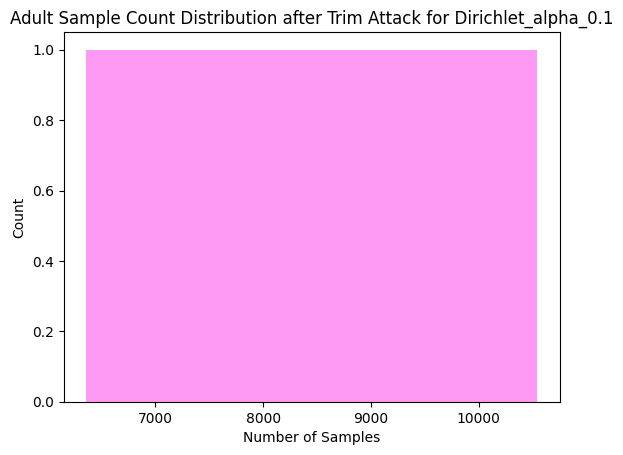

Class frequencies:
client,class0,class1,Amount
Client   2,0.136,0.864,8469
Client   7,1.000,0.00,6610
Client   8,1.000,0.00,12399


<Figure size 640x480 with 0 Axes>

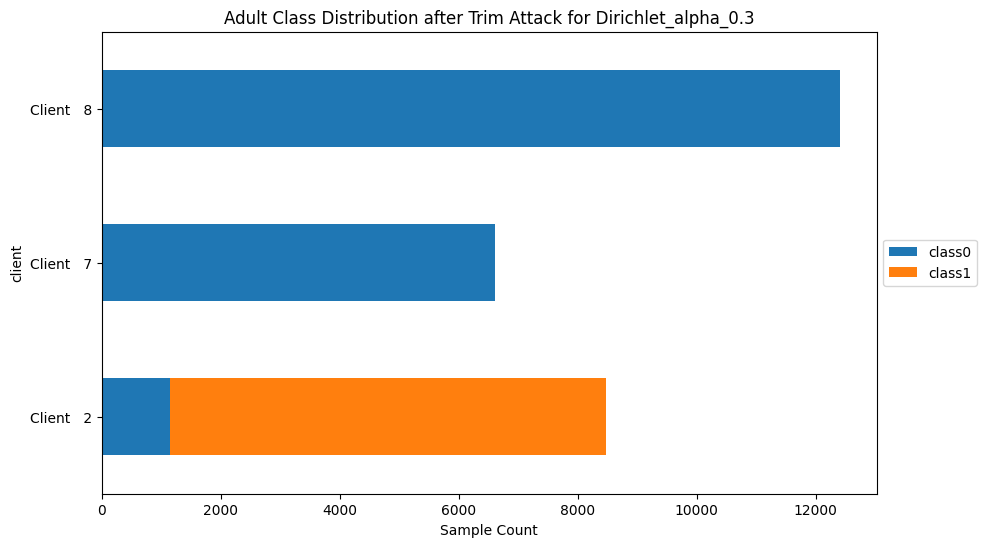

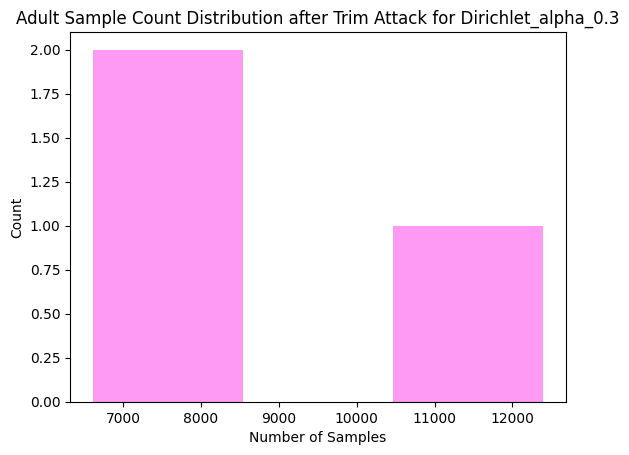

Class frequencies:
client,class0,class1,Amount
Client   1,0.294,0.706,4916
Client   3,1.000,0.00,3303
Client   8,1.000,0.00,12152


<Figure size 640x480 with 0 Axes>

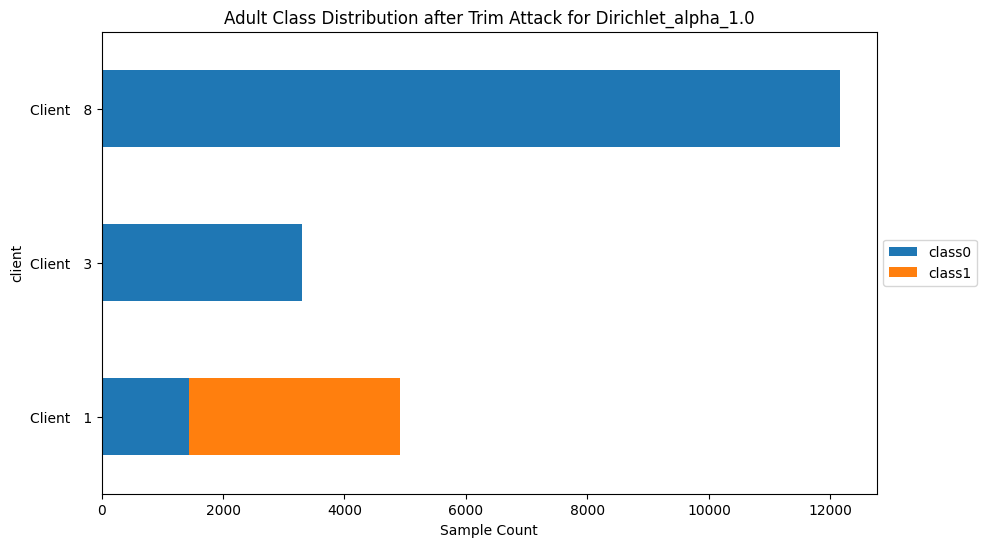

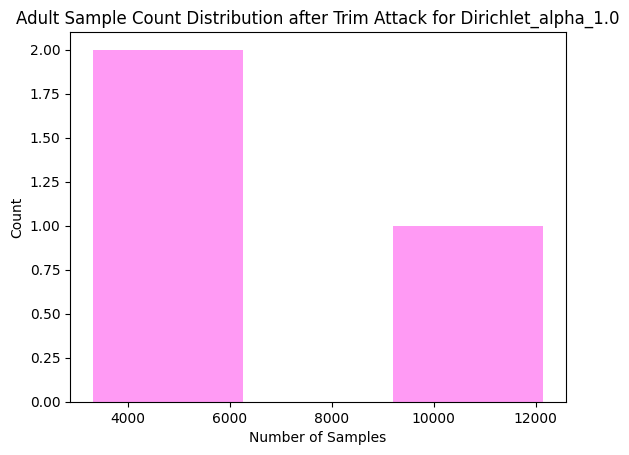

Class frequencies:
client,class0,class1,Amount
Client   1,1.000,0.00,5430
Client   5,0.783,0.217,3963
Client   8,1.000,0.00,4214


<Figure size 640x480 with 0 Axes>

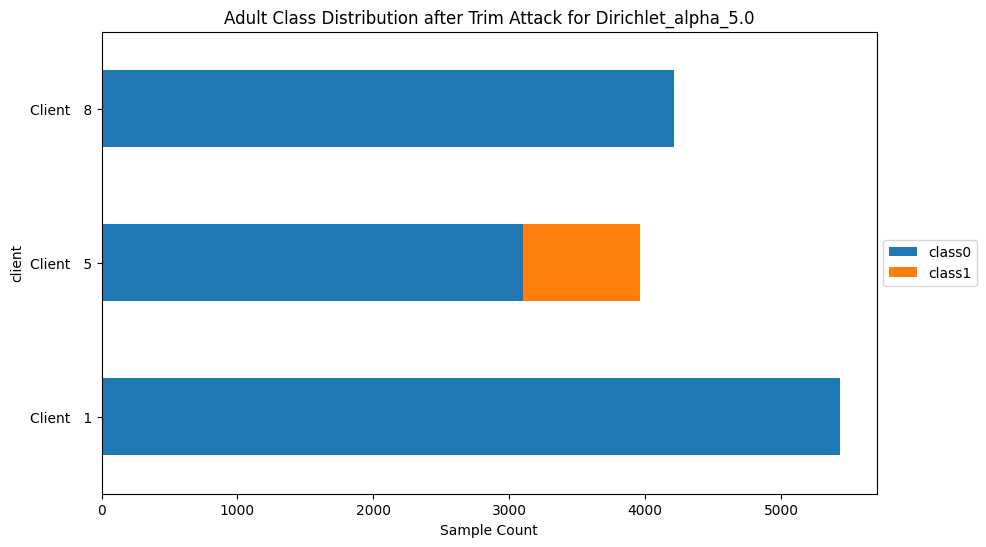

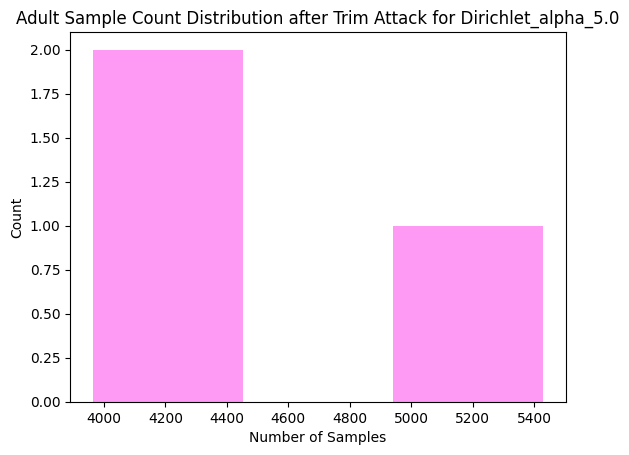

Class frequencies:
client,class0,class1,Amount
Client   1,1.000,0.00,4440
Client   5,0.767,0.233,3873
Client   8,1.000,0.00,3690


<Figure size 640x480 with 0 Axes>

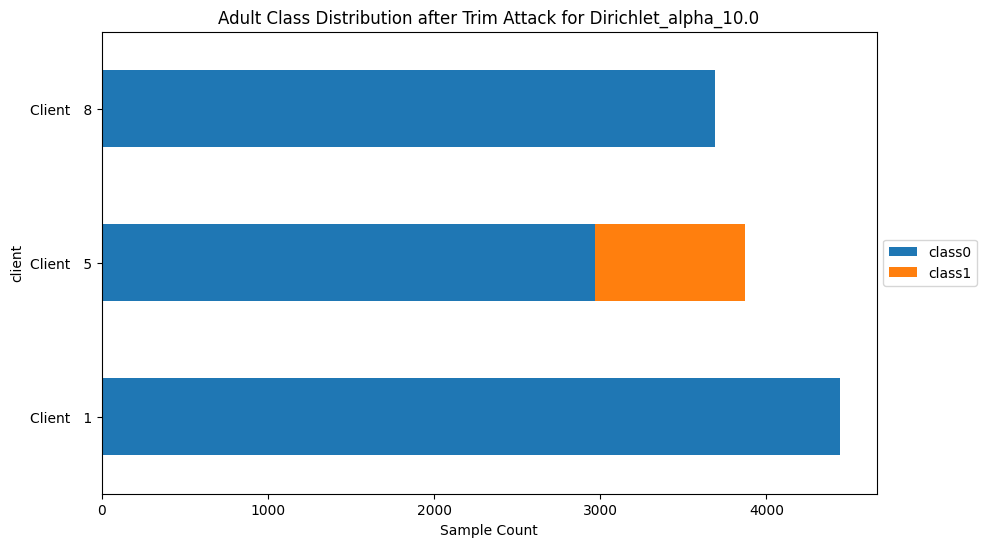

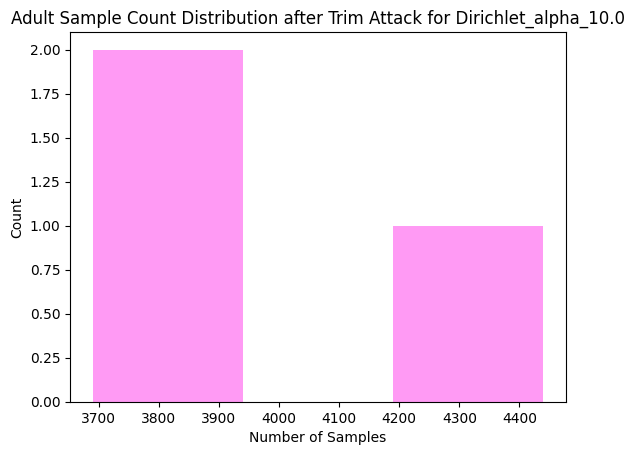

Class frequencies:
client,class0,class1,Amount
Client   7,0.768,0.232,3256
Client   8,0.763,0.237,3256
Client   9,0.753,0.247,3256


<Figure size 640x480 with 0 Axes>

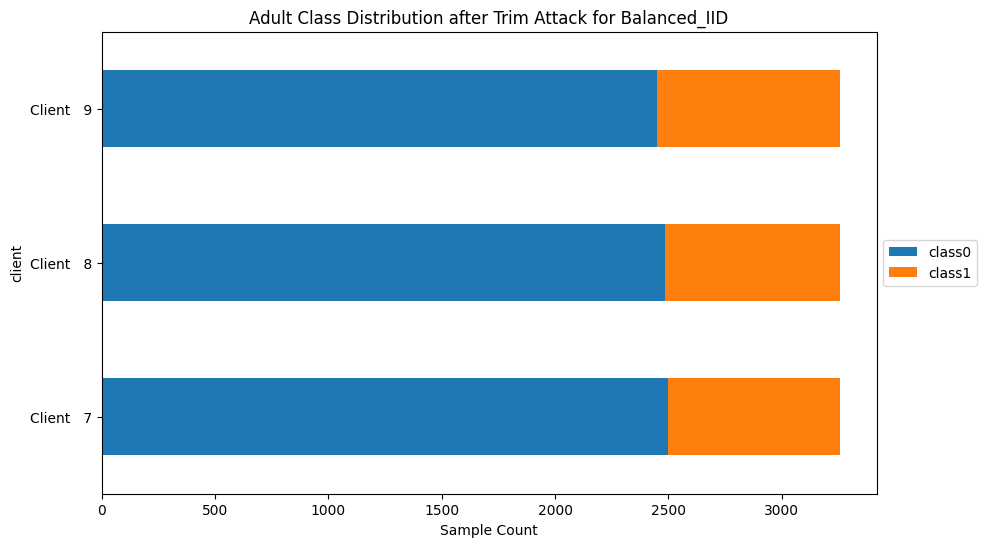

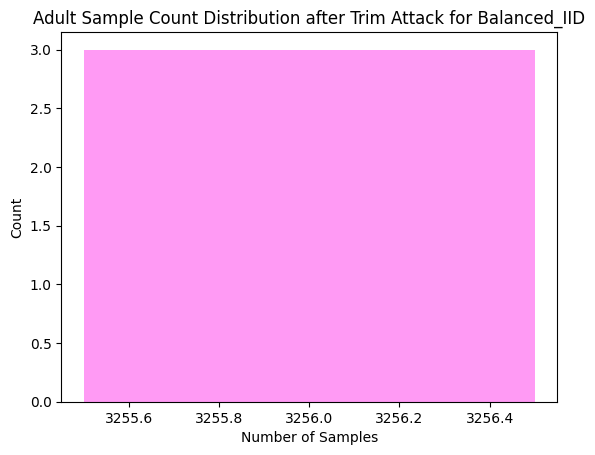

<Figure size 640x480 with 0 Axes>

In [7]:
trim_rate = 0.7
attack_results = {}

for name, part in partitions.items():
    adjusted_client_dict, trimmed_clients = full_knowledge_trim_attack(
        part, trim_rate=trim_rate
    )
    attack_results[name] = {
        "adjusted_client_dict": adjusted_client_dict,
        "trimmed_clients": trimmed_clients,
    }

    csv_file = f"./partition-reports/Adult_{name}_after_attack.csv"
    partition_report(
        trainset.targets, adjusted_client_dict, class_num=num_classes, file=csv_file
    )

    partition_df = pd.read_csv(csv_file, header=1).set_index("client")
    for col in col_names:
        partition_df[col] = (partition_df[col] * partition_df["Amount"]).astype(int)

    # Graph: Class distribution post-attack (First 10 clients)
    partition_df[col_names].iloc[:10].plot.barh(stacked=True, figsize=(10, 6))
    plt.title(f"Adult Class Distribution after Trim Attack for {name}")
    plt.xlabel("Sample Count")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(
        f"./imgs/Adult_{name}_class_distribution_after_attack.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()
    plt.clf()

    # Graph: Sample count distribution post-attack
    sns.histplot(
        data=partition_df["Amount"], color="#FF6FF0", edgecolor="none", alpha=0.7
    )
    plt.title(f"Adult Sample Count Distribution after Trim Attack for {name}")
    plt.xlabel("Number of Samples")
    plt.savefig(
        f"./imgs/Adult_{name}_sample_count_distribution_after_attack.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()
    plt.clf()

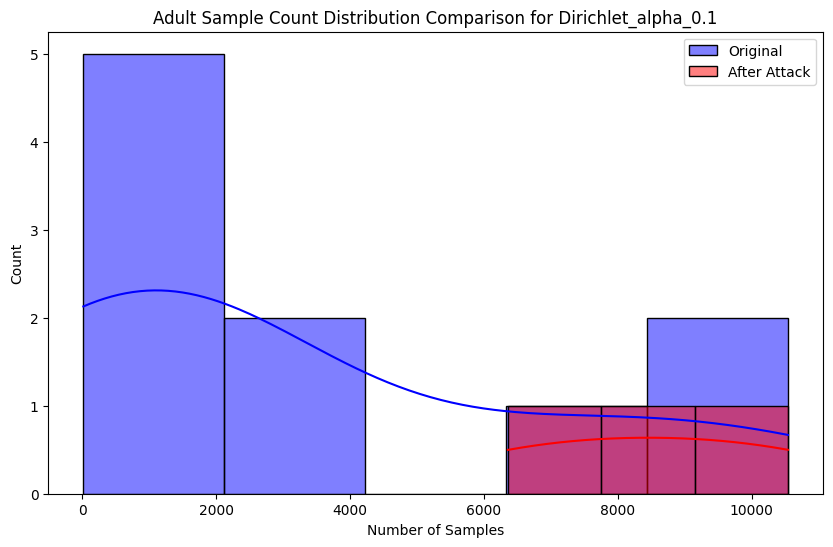

<Figure size 640x480 with 0 Axes>

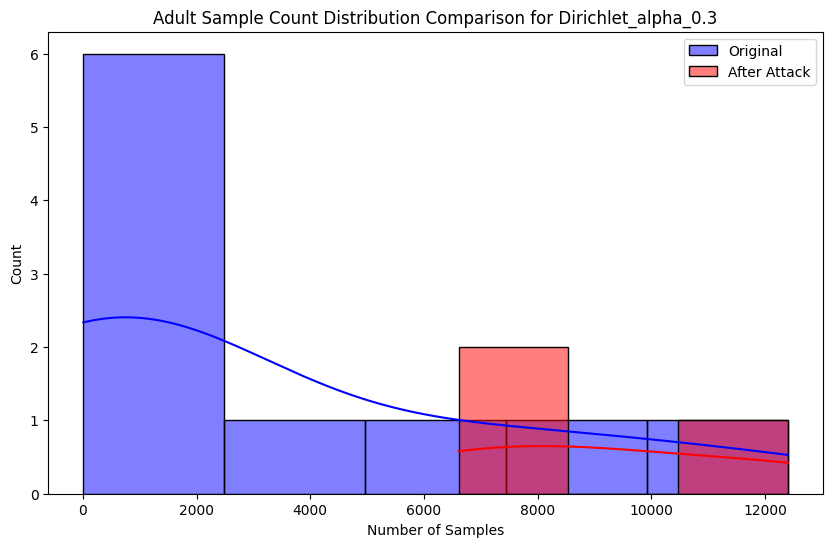

<Figure size 640x480 with 0 Axes>

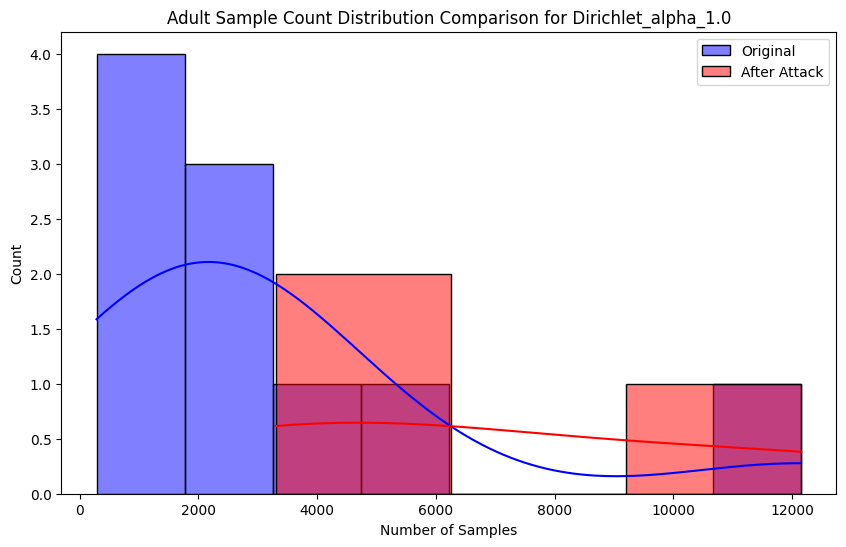

<Figure size 640x480 with 0 Axes>

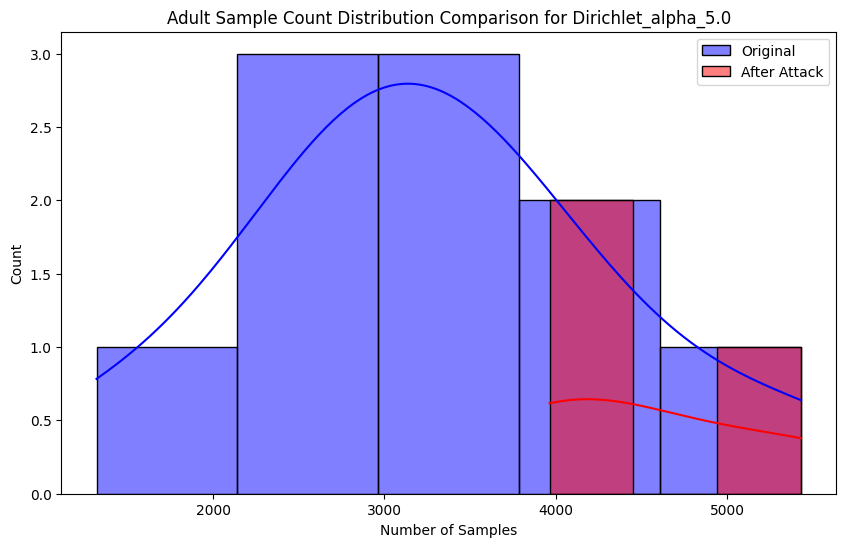

<Figure size 640x480 with 0 Axes>

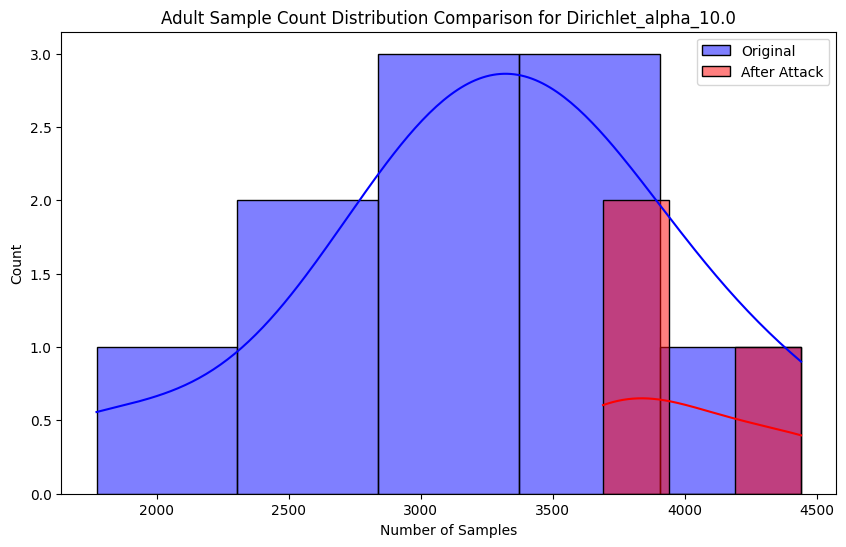

<Figure size 640x480 with 0 Axes>

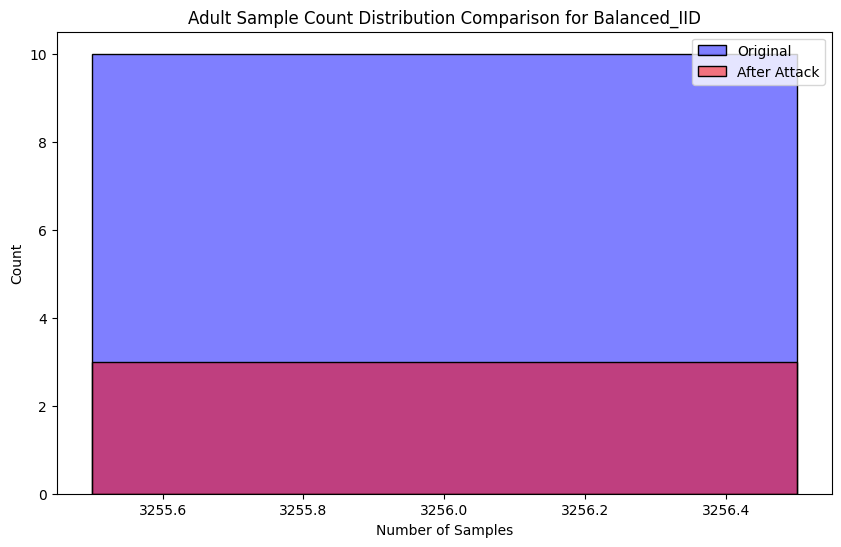

<Figure size 640x480 with 0 Axes>

In [8]:
for name in partitions.keys():
    original_report = pd.read_csv(f"./partition-reports/Adult_{name}.csv", header=1)
    attack_report = pd.read_csv(
        f"./partition-reports/Adult_{name}_after_attack.csv", header=1
    )

    # Comparison Graph: Original vs. Post-Attack Sample Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(
        original_report["Amount"], color="blue", label="Original", kde=True, alpha=0.5
    )
    sns.histplot(
        attack_report["Amount"], color="red", label="After Attack", kde=True, alpha=0.5
    )
    plt.title(f"Adult Sample Count Distribution Comparison for {name}")
    plt.xlabel("Number of Samples")
    plt.legend()
    plt.savefig(
        f"./imgs/Adult_{name}_sample_count_comparison.png", dpi=300, bbox_inches="tight"
    )
    plt.show()
    plt.clf()